<h1 align="center"> 
DATS 6202, Fall 2018, Homework_1_solution
</h1> 

<h4 align="center"> 
Author: Yuxiao Huang ([yuxiaohuang@gwu.edu](mailto:yuxiaohuang@gwu.edu))
</h4>

## Note
- Complete the missing parts indicated by # Implement me
- Submit an ipynb file named Homework_1.ipynb to [blackboard](https://blackboard.gwu.edu) folder /Assignments/Homework_1/
-  We expect you to follow a reasonable programming style. While we do not mandate a specific style, we require that your code to be neat, clear, **documented/commented** and above all consistent. **Marks will be deducted if these are not followed.**

## Overview
- Apply Simple Linear Regression on the the Housing dataset
- Specifically, you should implement two linear models:

$$
MEDV = w_0 + w_1 \alpha \quad \textrm{and} \quad MEDV = w_0 + w_1 \beta.
$$
Here:
- the target, $MEDV$, is the median value of owner-occupied homes in \$1000s
- $\alpha$ is the feature that has the largest negative correlation with $MEDV$, whereas $\beta$ the feature that has the largest positive correlation with $MEDV$
- The goal for this problem is to find the winning model (the one with the higher accuracy)

## Load data

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# The name of the features
features = ['LSTAT', 'INDUS', 'NOX', 'RM']

# The name of the target
target = 'MEDV'

# Get the data of the features and target
X, y = df[features].values, df[target].values

print([type(X), type(y)])

[<class 'numpy.ndarray'>, <class 'numpy.ndarray'>]


## Plot the data and regression model

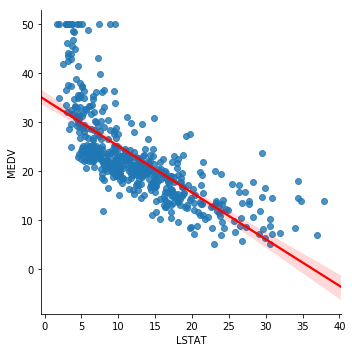

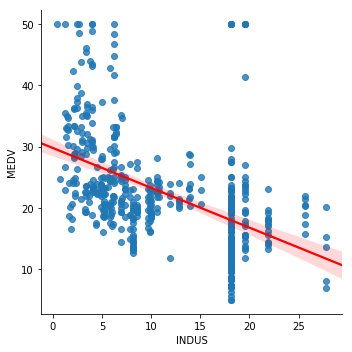

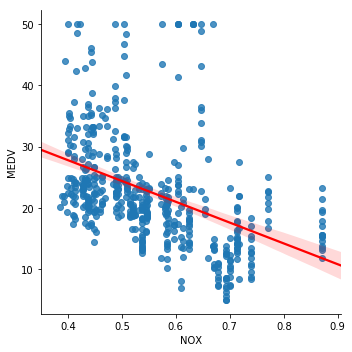

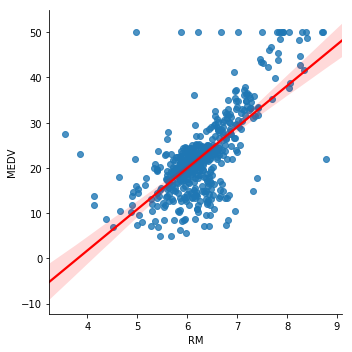

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For each feature
for feature in features:
    # Plot data and regression model comprised of the current feature and the target
    sns.lmplot(x=feature, y=target, data=df, line_kws={'color': 'red'})
    
plt.tight_layout()
plt.show()

# Get $\alpha$ and $\beta$

In [3]:
import numpy as np

# Get correlation matrix, where each entry is the Pearson product-moment correlation coefficients
cm = np.corrcoef(df[features + [target]].T)

# Get alpha (the feature that has the largest negative correlation with the target)
alpha = features[np.argmin(cm[-1:, :-1])]
# Get beta (the feature that has the largest positive correlation with the target)
beta = features[np.argmax(cm[-1:, :-1])]

# Print alpha and beta
print('alpha is: ' + alpha)
print('beta: ' + beta)

alpha is: LSTAT
beta: RM


# Plot the heat map

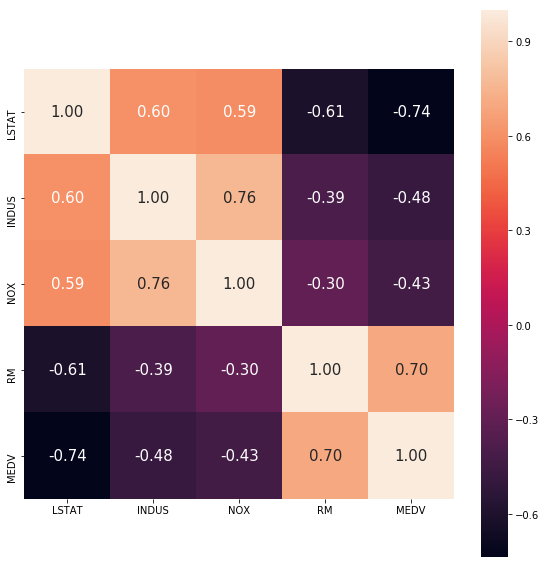

In [4]:
# Get heat map
plt.figure(figsize=(8,8))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=features + [target],
                 xticklabels=features + [target])

# Show heat map
plt.tight_layout()
plt.show()

# Create your first pipeline

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [6]:
def my_pipeline(test_size = 0.3, random_state = 0):
    """
    The function has the following major steps:
    1. Divide the data into training and testing
    2. Standardize the features and target
    3. Train the model on the training data
    4. Test the model on the testing data
    5. Plot the model on the testing data
    6. Get the accuracy of the model
    7. Print the winning model
    
    Parameters
    ----------
    test_size : the proportion for testing, 0.3 by default
    random_state : the seed used by the random number generator, 0 by default
    """
    
    # Divide the data into training and testing
    # Randomly choose 30% of the data for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Standardize the features and the target
    # Declare the standard scaler
    std_scaler = StandardScaler()

    # Standardize the training and testing data
    X_train = std_scaler.fit_transform(X_train)
    y_train = std_scaler.fit_transform(y_train.reshape(-1, 1)).reshape(-1)
    X_test = std_scaler.transform(X_test)
    y_test = std_scaler.transform(y_test.reshape(-1, 1)).reshape(-1)
    
    # Declare the linear regression model
    slr = LinearRegression()
    
    # The accuracy of the two models
    scores = []
    
    for feature in [alpha, beta]:
        # Get the index of the feature
        idx = features.index(feature)

        # Train the model on the training set
        slr.fit(X_train[:, idx].reshape(-1, 1), y_train)

        # Test the model on the testing set
        y_pred = slr.predict(X_test[:, idx].reshape(-1, 1))    

        # Plot the model on the testing set
        plt.scatter(X_test[:, idx], y_test, c='steelblue', edgecolor='white', s=70)
        plt.plot(X_test[:, idx], y_pred, color='black', lw=2)  
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.show()

        # Add the accuracy of the model
        scores.append(slr.score(X_test[:, idx].reshape(-1, 1), y_test))
        
    # Get the accuracy of the model
    score_alpha, score_beta = scores
        
    # Model comparsion
    # Print empty line
    print()

    # Print the accuracy
    print('Accuracy for feature ' + alpha + ': %.3f' % score_alpha)
    print('Accuracy for feature ' + beta + ': %.3f' % score_beta)

    # Print empty line
    print()

    # Print the winning model
    if score_alpha > score_beta:
        print('The winning model is the one based on feature: ' + alpha)
    elif score_alpha < score_beta:
        print('The winning model is the one based on feature: ' + beta)
    else:
        print('The two models are equally accurate')

# Run your first pipeline

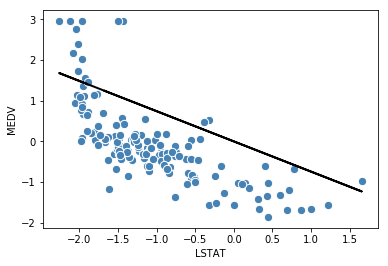

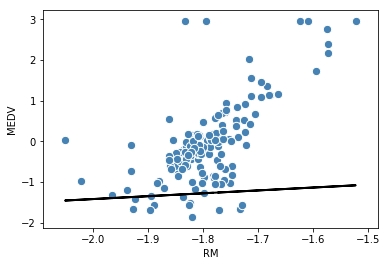


Accuracy for feature LSTAT: -0.232
Accuracy for feature RM: -1.385

The winning model is the one based on feature: LSTAT


In [7]:
my_pipeline(0.3, 0)

## Discussion
Obviously, there is something wrong in the figures above. The weird looking (fitted) lines were brought about by the bugs in the standardization (I provided) in your first pipeline. Fix the bugs by implementing your second pipeline.  

## Create your second pipeline

In [8]:
def my_second_pipeline(test_size = 0.3, random_state = 0):
    """
    The function has the following major steps:
    1. Divide the data into training and testing
    2. Standardize the features and target
    3. Train the model on the training data
    4. Test the model on the testing data
    5. Plot the model on the testing data
    6. Get the accuracy of the model
    7. Print the winning model
    
    Parameters
    ----------
    test_size : the proportion for testing, 0.3 by default
    random_state : the seed used by the random number generator, 0 by default
    """
    
    # Divide the data into training and testing
    # Randomly choose 30% of the data for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Standardize the features and the target
    # Declare the standard scaler
    std_scaler = StandardScaler()

    # Standardize the training and testing data
    X_train = std_scaler.fit_transform(X_train)
    X_test = std_scaler.transform(X_test)
    y_train = std_scaler.fit_transform(y_train.reshape(-1, 1)).reshape(-1)
    y_test = std_scaler.transform(y_test.reshape(-1, 1)).reshape(-1)
    
    # Declare the linear regression model
    slr = LinearRegression()
    
    # The accuracy of the two models
    scores = []
    
    for feature in [alpha, beta]:
        # Get the index of the feature
        idx = features.index(feature)

        # Train the model on the training set
        slr.fit(X_train[:, idx].reshape(-1, 1), y_train)

        # Test the model on the testing set
        y_pred = slr.predict(X_test[:, idx].reshape(-1, 1))    

        # Plot the model on the testing set
        plt.scatter(X_test[:, idx], y_test, c='steelblue', edgecolor='white', s=70)
        plt.plot(X_test[:, idx], y_pred, color='black', lw=2)  
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.show()

        # Add the accuracy of the model
        scores.append(slr.score(X_test[:, idx].reshape(-1, 1), y_test))
        
    # Get the accuracy of the model
    score_alpha, score_beta = scores
        
    # Model comparsion
    # Print empty line
    print()

    # Print the accuracy
    print('Accuracy for feature ' + alpha + ': %.3f' % score_alpha)
    print('Accuracy for feature ' + beta + ': %.3f' % score_beta)

    # Print empty line
    print()

    # Print the winning model
    if score_alpha > score_beta:
        print('The winning model is the one based on feature: ' + alpha)
    elif score_alpha < score_beta:
        print('The winning model is the one based on feature: ' + beta)
    else:
        print('The two models are equally accurate')

## Run your second pipeline

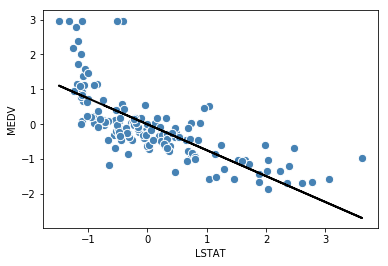

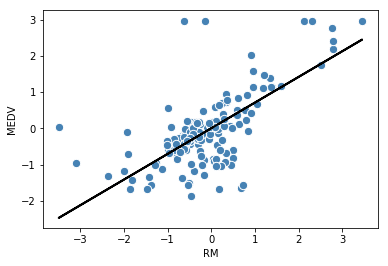


Accuracy for feature LSTAT: 0.522
Accuracy for feature RM: 0.435

The winning model is the one based on feature: LSTAT


In [9]:
my_second_pipeline(0.3, 0)

## Run your second pipeline again, using a different random_state

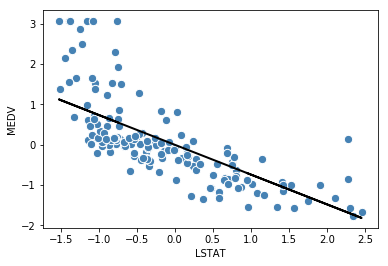

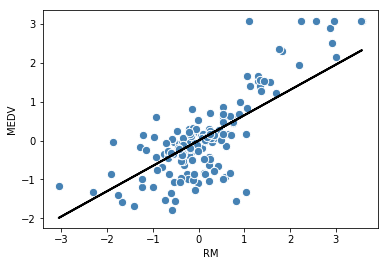


Accuracy for feature LSTAT: 0.535
Accuracy for feature RM: 0.602

The winning model is the one based on feature: RM


In [10]:
my_second_pipeline(0.3, 1)

## Discussion
As shown in the two figures above, the winning model obtained from the two runs are different (LSTAT from the first whereas RM from the second). This is due to the random split (for training and testing) obtained from the train_test_split function. Specifically, LSTAT works better for the first split (when using random_state = 0) whereas RM works better for the second (random_state = 1).

Intuitively, if we test a model using multiple splits, and use the average accuray across all the splits as the result, then this average will be more reliable than the accuracy using a single split. This is one reason why cross validation is required for model comparsion. [Here](http://scikit-learn.org/stable/modules/cross_validation.html) is a nice review for cross validation (we will discuss this in detail in the later courses). Below is one of the many ways to implement cross validation, using sklearn [make_pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html).

## A more robust approach for model comparsion

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Make pipeline with StandardScaler and LinearRegression
clf = make_pipeline(StandardScaler(), LinearRegression())

# Get the list of accuracy across 10-fold cross validation
scores_alpha = cross_val_score(clf, X[:, features.index(alpha)].reshape(-1, 1), y, cv=10)
scores_beta = cross_val_score(clf, X[:, features.index(beta)].reshape(-1, 1), y, cv=10)

# Print the list of accuracy obtained by 10-fold cross validation
print('The list of accuracy for feature ' + alpha + ': ')
print(scores_alpha)
print('The list of accuracy for feature ' + beta + ': ')
print(scores_beta)

# Get the average accuracy
avg_score_alpha = scores_alpha.mean()
avg_score_beta = scores_beta.mean()

# Print empty line
print()

# Print the average accuracy obtained by 10-fold cross validation
print('Average accuracy for feature ' + alpha + ': %.3f' % avg_score_alpha)
print('Average accuracy for feature ' + beta + ': %.3f' % avg_score_beta)

# Print empty line
print()

# Print the winning model
if avg_score_alpha > avg_score_beta:
    print('The winning model is the one based on feature: ' + alpha)
elif avg_score_alpha < avg_score_beta:
    print('The winning model is the one based on feature: ' + beta)
else:
    print('The two models are equally accurate')

The list of accuracy for feature LSTAT: 
[ 0.40007609  0.16874914 -1.70428541  0.20020956  0.25025747 -0.01127652
 -1.37095206  0.55227354 -0.51057315  0.17870403]
The list of accuracy for feature RM: 
[ 0.56789192  0.80745302 -0.54477417  0.34693869  0.74372546  0.51130486
  0.75803107 -0.41345788 -5.13329341 -0.03202355]

Average accuracy for feature LSTAT: -0.185
Average accuracy for feature RM: -0.239

The winning model is the one based on feature: LSTAT
